# this will focus on the binary features that extend a pump just purely off what we use and ceretain key features about it
we want to do this because sometimes sensors can fail so if we begin already with the best pre settings, we can already extend the lifetime of a pump.
we will begin back with the original file.


# we will now begin cleaning our data again

the code below is highlighting missing values

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/rodpump_failure_final.csv")

# Display all column names
print(df.columns)


Index(['roduid', 'UWI', 'NODEID', 'IDWELL', 'tbguid', 'lifetime_start',
       'lifetime_end', 'IDRECJOBPULL', 'REPORTTO', 'FAILSTART', 'FAILURETYPE',
       'H2S_CONCENTRATION', 'PrimarySetpoint', 'SecondarySetpoint',
       'StrokeLength', 'GrossStrokeLength', 'Fillage', 'YesterdaysAverageSPM',
       'bha_configuration', 'chemgroup1_any', 'chemgroup1_all',
       'chemgroup2_any', 'chemgroup2_all', 'chemgroup3_any', 'chemgroup3_all',
       'max_unguided_dls', 'dls_high_in_hole', 'gas_anchor_length',
       'MAX_INCLINATION', 'wellbore_category', 'manual_scale', 'packer_vs_tac',
       'AVG_PRESS_FLOWLINE', 'AVG_PRESSURE_TUBING', 'AVG_PRESSURE_CASING',
       'AVG_DIFFERENTIAL_PRESSURE', 'AVG_OIL_VOLUME', 'AVG_WATER_VOLUME',
       'AVG_LIQUID_VOLUME', 'AVG_WATERSG', 'rod_sinker_type', 'rod_has_guides',
       'rod_make', 'rod_apigrade', 'ROUTE', 'overall_max_sideload',
       'shallow_max_sideload', 'max_unguided_sideload', 'DESANDDEGAS_TYP',
       'CHROME_LENGTH', 'ENDURALLOY_LEN

we want to get rid of any features that requires some sort of monitor/sensor. We want to be proactive about extendin the life and we want to see which features are the best for that.

#we will drop:
1. max_unguided_sideload
2. shallow_mad_sideload 
3. overall_max_sideload
4. route (this does not add value)
5. AVG_WATERSG
6. AVG_LIQUID_VOLUME
7. AVG_WATER_VOLUME
8. AVG_OIL_VOLUME
9. AVG_PRESSURE_CASING
10. AVG_PRESS_FLOWLINE
11. AVG_PRESSURE_TUBING
12. YesterdaysAverageSPM
13. FAILSTART (instructed to remove this)
14. Fillage
15. REPORTTO
16. dls_high_in_hole
17. max_unguided_dls
16. lifetime_start (we will just make the days columns, easier to visualize)
17. lifetime_end


we also don't need the identifiers when we run the models, i will keep them but they will get dropped before they begin to not create noise. this includes:
1. toduid
2. UWI
3. NODEID
4. IDWELL
5. tbguid
6. IDRECJOBPULL

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/rodpump_failure_final.csv')

# Create the days feature
df['days'] = (pd.to_datetime(df['lifetime_end']) - pd.to_datetime(df['lifetime_start'])).dt.days

# Fill missing 'FAILURE_TYPE' based on 'lifetime_end'
df.loc[df["lifetime_end"] == "2020-04-15 17:37:11.338", "FAILURETYPE"] = df["FAILURETYPE"].fillna("No fail")
df.loc[df["lifetime_end"] != "2020-04-15 17:37:11.338", "FAILURETYPE"] = df["FAILURETYPE"].fillna("Unknown")

# Drop the specified columns
columns_to_drop = [
    'max_unguided_sideload', 'shallow_max_sideload', 'overall_max_sideload', 'ROUTE',
    'AVG_WATERSG', 'AVG_LIQUID_VOLUME', 'AVG_WATER_VOLUME', 'AVG_OIL_VOLUME',
    'AVG_PRESSURE_CASING', 'AVG_PRESS_FLOWLINE', 'AVG_PRESSURE_TUBING', 'YesterdaysAverageSPM',
    'FAILSTART', 'Fillage', 'REPORTTO', 'lifetime_start', 'lifetime_end', 'AVG_DIFFERENTIAL_PRESSURE',
    'dls_high_in_hole', 'max_unguided_dls'
]

# Drop the columns from the dataframe
df_cleaned = df.drop(columns=columns_to_drop)

# Save the cleaned file
output_path = "../extendedLifeData/binaryColumnsOnly.csv"
df_cleaned.to_csv(output_path, index=False)

print(f"File saved as {output_path}")


File saved as ../extendedLifeData/binaryColumnsOnly.csv


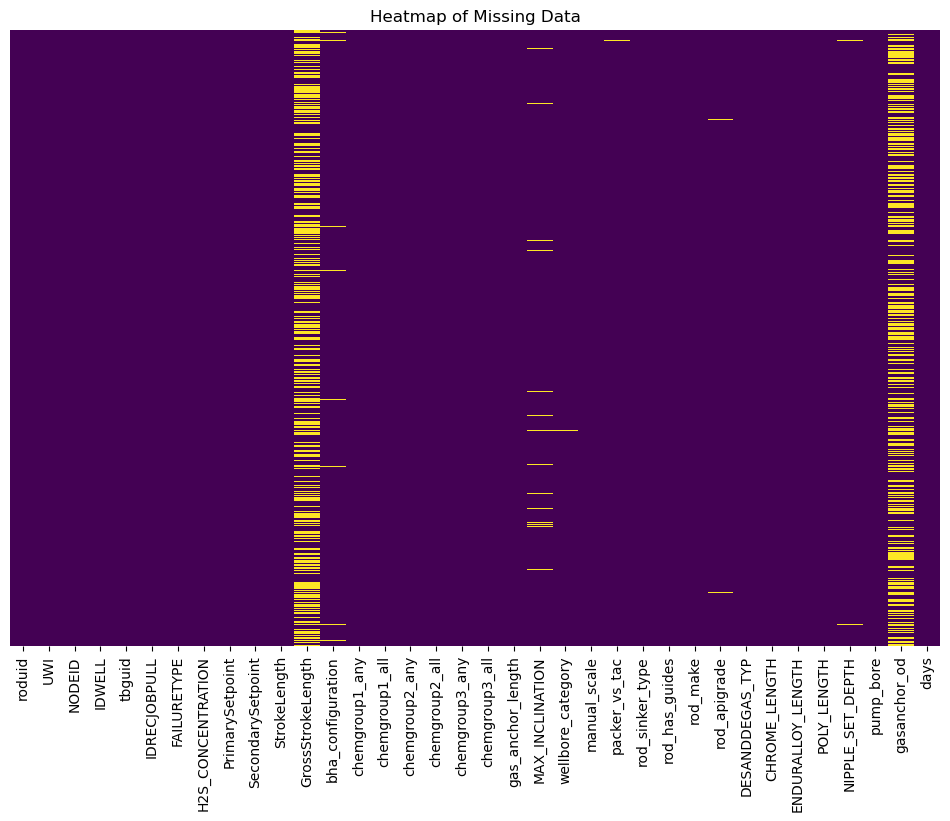

In [7]:
#now lets see how much data we are missing \
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../extendedLifeData/binaryColumnsOnly.csv')  # Replace with the correct file path

# Create a heatmap to show missing data
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Data")
plt.show()


since we have strokelength, we can drop gorssStrokeLength. 
gasAnchor is missing too many values, dropped
teh rest if empty, drop them, we cannot guess on them

In [8]:
import pandas as pd

# Load the cleaned file
df_cleaned = pd.read_csv("../extendedLifeData/binaryColumnsOnly.csv")

# Drop the specified columns
df_cleaned = df_cleaned.drop(columns=['GrossStrokeLength', 'gasanchor_od'])

# Drop rows where any cell is empty (NaN), but keep rows with zero values
df_cleaned = df_cleaned.dropna()

# Save the cleaned file as 'fullFile.csv'
output_path = "../extendedLifeData/fullFile.csv"
df_cleaned.to_csv(output_path, index=False)

print(f"File saved as {output_path}")


File saved as ../extendedLifeData/fullFile.csv


Number of rows: 2495


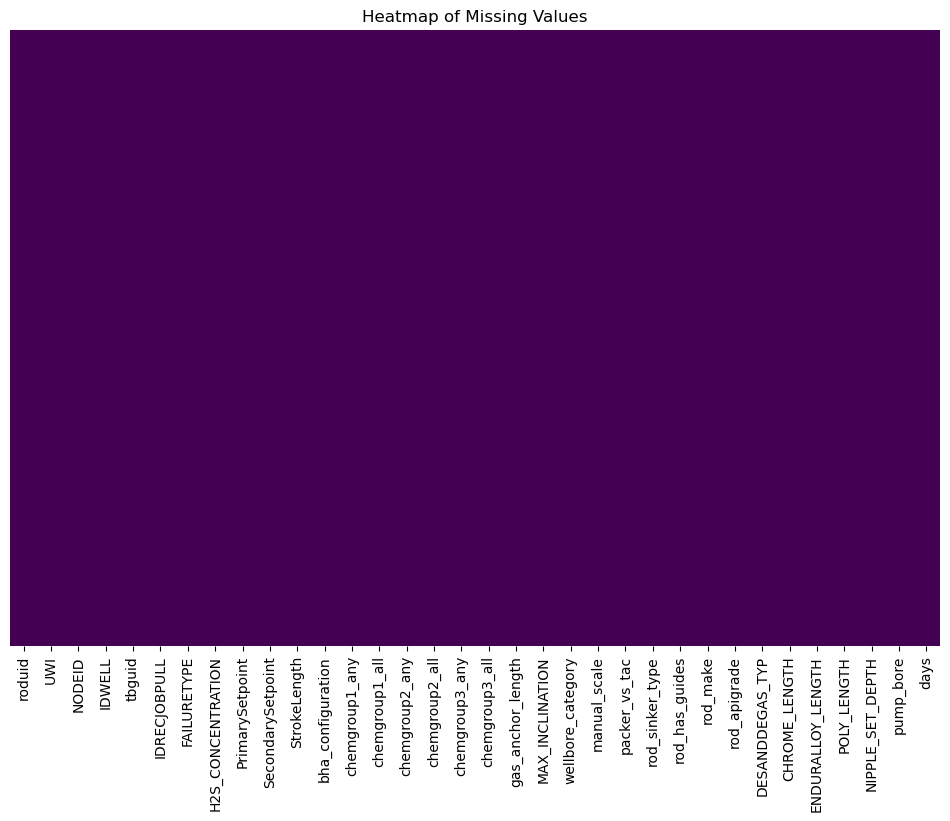

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned file
df_cleaned = pd.read_csv("../extendedLifeData/fullFile.csv")

# Print the number of rows
print(f"Number of rows: {df_cleaned.shape[0]}")

# Check for missing values (NaN)
missing_data = df_cleaned.isna()

# Create a heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cmap='viridis', cbar=False, yticklabels=False)

# Display the heatmap
plt.title('Heatmap of Missing Values')
plt.show()


#now to clean any data errors
1. pump_bore having entries as "Other"
2. NIPPLE_SET_DEPTH == 0
3.  SecondarySEtpoint or PrimarySetpoint == 0
4. StrokeLength ==0 

In [25]:
import pandas as pd

# Load the cleaned file
df_cleaned = pd.read_csv("../extendedLifeData/fullFile.csv")

# Drop rows where any of the following conditions are met:
df_cleaned = df_cleaned[~df_cleaned['pump_bore'].str.contains('Other', na=False)]
df_cleaned = df_cleaned[df_cleaned['NIPPLE_SET_DEPTH'] != 0]
df_cleaned = df_cleaned[df_cleaned['SecondarySetpoint'] != 0]
df_cleaned = df_cleaned[df_cleaned['PrimarySetpoint'] != 0]
df_cleaned = df_cleaned[df_cleaned['StrokeLength'] != 0]

# Print the number of rows left
print(f"Number of rows left: {df_cleaned.shape[0]}")

# Save the cleaned file
df_cleaned.to_csv("../extendedLifeData/cleaned.csv", index=False)


Number of rows left: 2274


# cleaning is now done
# we are now going into model creation

we strated with the same model we ended with as before. We will see which pumps have a "long" lifetime. This means they will be within the top quartile of longest running pumps.


Cross-Validation Scores:  [0.81405564 0.81112738 0.82258065 0.81671554 0.79912023]
Mean Cross-Validation Accuracy:  0.8127198876785615
Standard Deviation of Cross-Validation Accuracy:  0.007777797486474669

Top Features Selected by XGBoost and Their Importance:
              Feature  Importance
2   SecondarySetpoint    0.210801
16          pump_bore    0.145880
4      chemgroup1_any    0.094526
7      chemgroup2_all    0.092964
1     PrimarySetpoint    0.065075
14        POLY_LENGTH    0.059374
0   H2S_CONCENTRATION    0.051246
6      chemgroup2_any    0.051023
3        StrokeLength    0.038900
10  gas_anchor_length    0.033447
9      chemgroup3_all    0.030853
5      chemgroup1_all    0.028785
11    MAX_INCLINATION    0.028709
13  ENDURALLOY_LENGTH    0.027318
15   NIPPLE_SET_DEPTH    0.026336
8      chemgroup3_any    0.010287
12      CHROME_LENGTH    0.004477


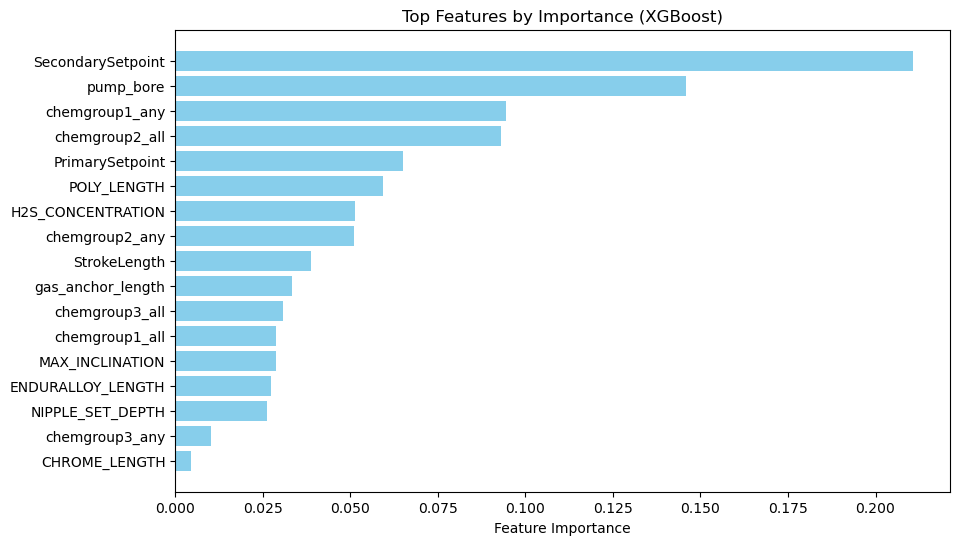

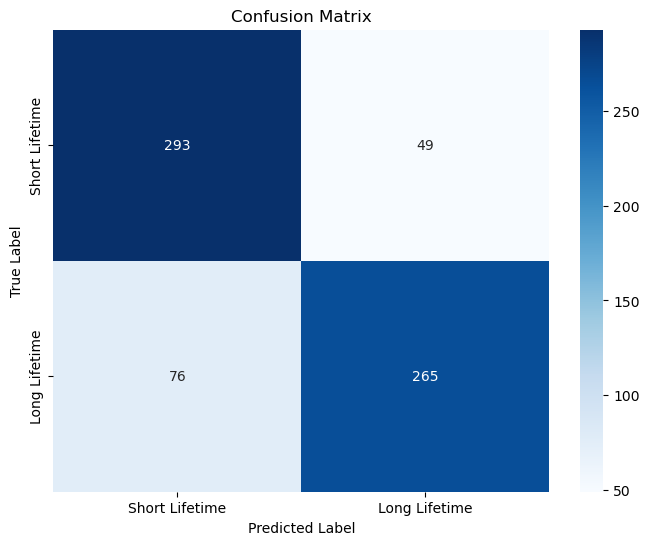


Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.86      0.82       342
        True       0.84      0.78      0.81       341

    accuracy                           0.82       683
   macro avg       0.82      0.82      0.82       683
weighted avg       0.82      0.82      0.82       683



In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the cleaned data
file_path = "../extendedLifeData/cleaned.csv"
df = pd.read_csv(file_path)

# Drop unnecessary identifier columns
identifier_columns = [
    'roduid', 'UWI', 'NODEID', 'IDWELL', 'tbguid', 'IDRECJOBPULL'
]
df.drop(columns=identifier_columns, inplace=True)

# Create 'long_lifetime' based on the 'days' column
df['long_lifetime'] = df['days'] > df['days'].quantile(0.75)

# Drop 'days' and 'FAILURETYPE' columns for modeling purposes
df.drop(columns=['FAILURETYPE', 'days'], inplace=True)

# One-hot encode the categorical columns
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns=['long_lifetime'])
y = df['long_lifetime']

# Ensure X is numeric before applying mRMR (which doesn't work with categorical variables)
X = X.select_dtypes(include=[np.number])

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize XGBoost model
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Cross-validation setup (StratifiedKFold ensures balanced folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and capture the accuracy scores
cross_val_scores = cross_val_score(xgb_model, X_resampled, y_resampled, cv=cv, scoring='accuracy')

# Print cross-validation results
print("\nCross-Validation Scores: ", cross_val_scores)
print("Mean Cross-Validation Accuracy: ", cross_val_scores.mean())
print("Standard Deviation of Cross-Validation Accuracy: ", cross_val_scores.std())

# Optionally, train the model on the whole resampled data and evaluate results
xgb_model.fit(X_resampled, y_resampled)

# Feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top features
print("\nTop Features Selected by XGBoost and Their Importance:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top Features by Importance (XGBoost)')
plt.gca().invert_yaxis()
plt.show()

# Train-test split for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train final XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Short Lifetime', 'Long Lifetime'], yticklabels=['Short Lifetime', 'Long Lifetime'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Model evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# results
the model didn't do horrible. It can identify correctly about 82% of the time but it can still do better.

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../extendedLifeData/cleaned.csv')

# Drop identifier columns
identifier_columns = ['roduid', 'UWI', 'NODEID', 'IDWELL', 'tbguid', 'IDRECJOBPULL']
df.drop(columns=identifier_columns, inplace=True)

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Create 'long_lifetime' target based on the top 15% longest lifetimes
df['long_lifetime'] = df['days'] > df['days'].quantile(0.85)
X = df.drop(columns=['days', 'long_lifetime'])
y = df['long_lifetime']

# Feature Selection (SelectKBest with Mutual Information)
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 20 features
X_selected = selector.fit_transform(X, y)

# Apply SMOTE to balance dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_selected, y)

# Split data into Train (70%), Validation (15%), and Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_res, y_res, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize XGBoost Classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15],
    'learning_rate': [0.1, 0.01],
    'reg_lambda': [1, 10]
}
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters & cross-validation results
print(f"Best Hyperparameters: {grid_search.best_params_}")
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

# Evaluate on validation & test sets
val_preds = grid_search.best_estimator_.predict(X_val)
test_preds = grid_search.best_estimator_.predict(X_test)

# Print classification reports for both validation and test sets
print("Classification Report for Validation Set:")
print(classification_report(y_val, val_preds))

print("Classification Report for Test Set:")
print(classification_report(y_test, test_preds))

# Feature Importance
importance = grid_search.best_estimator_.feature_importances_
feature_names = X.columns[selector.get_support()]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Top Features by Importance:")
print(feature_importance)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'reg_lambda': 10}
Cross-validation scores: [0.9095941  0.94454713 0.92051756 0.90942699 0.92236599]
Mean CV Accuracy: 0.9212903533841252
Classification Report for Validation Set:
              precision    recall  f1-score   support

       False       0.87      0.95      0.91       284
        True       0.94      0.87      0.90       296

    accuracy                           0.91       580
   macro avg       0.91      0.91      0.91       580
weighted avg       0.91      0.91      0.91       580

Classification Report for Test Set:
              precision    recall  f1-score   support

       False       0.90      0.96      0.93       296
        True       0.95      0.89      0.92       284

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580

Top Features by Importance:
              Featur

# when the algorithm selects the best features it is the best so far with 93% accuracy.
this is very promising but we still need to check to see its final unceranity model to see how good it truly is.

# model creation ends here, begin uncertanity testing

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'reg_lambda': 10}
Cross-validation scores: [0.92066421 0.93160813 0.92791128 0.9168207  0.91497227]
Mean CV Accuracy: 0.9223953182230529
Classification Report for Validation Set:
              precision    recall  f1-score   support

       False       0.87      0.95      0.91       284
        True       0.95      0.86      0.90       296

    accuracy                           0.91       580
   macro avg       0.91      0.91      0.91       580
weighted avg       0.91      0.91      0.91       580

Classification Report for Test Set:
              precision    recall  f1-score   support

       False       0.89      0.96      0.92       296
        True       0.95      0.88      0.91       284

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580

Top Features by Importance:
              Featur

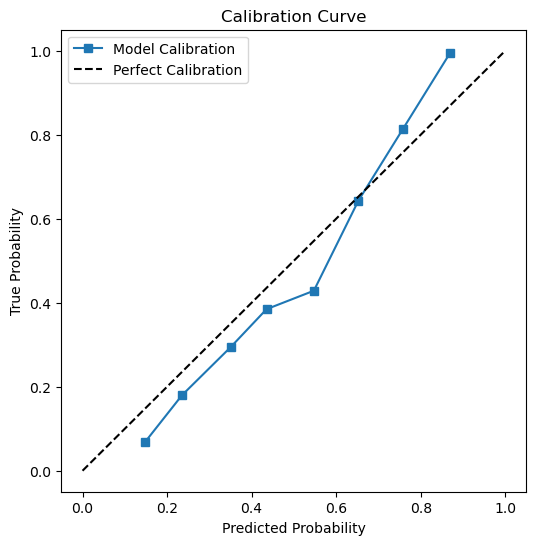

Spearman Correlation between Uncertainty and Error: 0.3166 (p=0.0000)


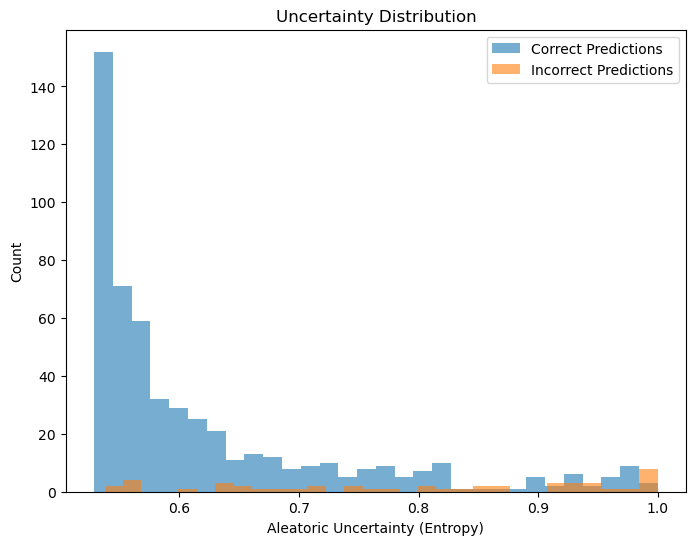

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from scipy.stats import spearmanr
from scipy.optimize import minimize

# Load data
df = pd.read_csv('../extendedLifeData/cleaned.csv')

# Drop identifier columns
identifier_columns = ['roduid', 'UWI', 'NODEID', 'IDWELL', 'tbguid', 'IDRECJOBPULL']
df.drop(columns=identifier_columns, inplace=True)

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Create 'long_lifetime' target based on the top 15% longest lifetimes
df['long_lifetime'] = df['days'] > df['days'].quantile(0.85)
X = df.drop(columns=['days', 'long_lifetime'])
y = df['long_lifetime']

# Feature Selection (SelectKBest with Mutual Information)
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 20 features
X_selected = selector.fit_transform(X, y)

# Apply SMOTE to balance dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_selected, y)

# Split data into Train (70%), Validation (15%), and Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_res, y_res, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize XGBoost Classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15],
    'learning_rate': [0.1, 0.01],
    'reg_lambda': [1, 10]
}
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters & cross-validation results
print(f"Best Hyperparameters: {grid_search.best_params_}")
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

# Evaluate on validation & test sets
val_preds = grid_search.best_estimator_.predict(X_val)
test_probs = grid_search.best_estimator_.predict_proba(X_test)
test_preds = np.argmax(test_probs, axis=1)

# Print classification reports
print("Classification Report for Validation Set:")
print(classification_report(y_val, val_preds))

print("Classification Report for Test Set:")
print(classification_report(y_test, test_preds))

# Feature Importance
importance = grid_search.best_estimator_.feature_importances_
feature_names = X.columns[selector.get_support()]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Top Features by Importance:")
print(feature_importance)

# Temperature Scaling Function
def temperature_scaling(logits, temperature):
    """Applies temperature scaling to the logits."""
    return np.exp(logits / temperature) / np.sum(np.exp(logits / temperature), axis=1, keepdims=True)

# Function to compute the optimal temperature
def optimal_temperature(logits, labels):
    """Find the optimal temperature by minimizing cross-entropy loss on the validation set."""
    def objective(temp):
        prob = temperature_scaling(logits, temp)
        log_loss = -np.mean(labels * np.log(prob[:, 1]) + (1 - labels) * np.log(1 - prob[:, 1]))
        return log_loss
    
    # Minimize the loss over possible temperatures (starting from T=1)
    result = minimize(objective, x0=[1], bounds=[(0.5, 5)])
    return result.x[0]

# Calculate optimal temperature using validation set logits
logits = grid_search.best_estimator_.predict_proba(X_val)
optimal_temp = optimal_temperature(logits, y_val)
print(f"Optimal Temperature: {optimal_temp}")

# Apply temperature scaling on test set probabilities
scaled_test_probs = temperature_scaling(test_probs, optimal_temp)

# Evaluate using scaled probabilities
scaled_test_preds = np.argmax(scaled_test_probs, axis=1)

# Print classification report with scaled probabilities
print("Classification Report for Scaled Test Set:")
print(classification_report(y_test, scaled_test_preds))

# Function to analyze uncertainty
def analyze_uncertainty(test_probs, y_test):
    # Compute predicted class labels
    test_preds = np.argmax(test_probs, axis=1)
    
    # Compute uncertainty using entropy
    aleatoric_uncertainty = -np.sum(test_probs * np.log2(test_probs + 1e-9), axis=1)
    
    # 1. Calibration Curve
    prob_true, prob_pred = calibration_curve(y_test, test_probs[:, 1], n_bins=10)
    plt.figure(figsize=(6, 6))
    plt.plot(prob_pred, prob_true, "s-", label="Model Calibration")
    plt.plot([0, 1], [0, 1], "k--", label="Perfect Calibration")
    plt.xlabel("Predicted Probability")
    plt.ylabel("True Probability")
    plt.title("Calibration Curve")
    plt.legend()
    plt.show()
    
    # 2. Correlation Between Uncertainty & Errors
    errors = (test_preds != y_test)
    correlation, p_value = spearmanr(aleatoric_uncertainty, errors)
    print(f"Spearman Correlation between Uncertainty and Error: {correlation:.4f} (p={p_value:.4f})")
    
    # 3. Uncertainty Distribution Plot
    plt.figure(figsize=(8, 6))
    plt.hist(aleatoric_uncertainty[y_test == test_preds], bins=30, alpha=0.6, label="Correct Predictions")
    plt.hist(aleatoric_uncertainty[y_test != test_preds], bins=30, alpha=0.6, label="Incorrect Predictions")
    plt.xlabel("Aleatoric Uncertainty (Entropy)")
    plt.ylabel("Count")
    plt.title("Uncertainty Distribution")
    plt.legend()
    plt.show()
    
    return correlation, p_value

# Run uncertainty analysis on scaled probabilities
correlation, p_value = analyze_uncertainty(scaled_test_probs, y_test)


# the model is overconfident at the start and under at the top. This could be due to several reasons but this shows the model is not generalizing that well overall.
# this is the last model as it is the end of the class but this model still requires work to be able to better capture long vs short term pumps.